In [1]:
%matplotlib notebook

In [2]:
import xemc3
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [41]:
felix_folder = "/u/flr/data/EMC3-runs/W7X/EIM-SC/Reference"
#felix_folder = "/u/flr/public/phg"
philip_folder =  "/u/phg/adas/atomdatpy/NetCDFs-new"
experiment_folder = "N03.00_P05.00_D02_R04.50-C"
# "N03.00_P05.00_D05_C04.50-TEST"
# "N03.00_P05.00_D05_C02.50-TEST"

In [42]:
ds = xr.open_dataset(f"{philip_folder}/{experiment_folder}.nc")

<IPython.core.display.Javascript object>


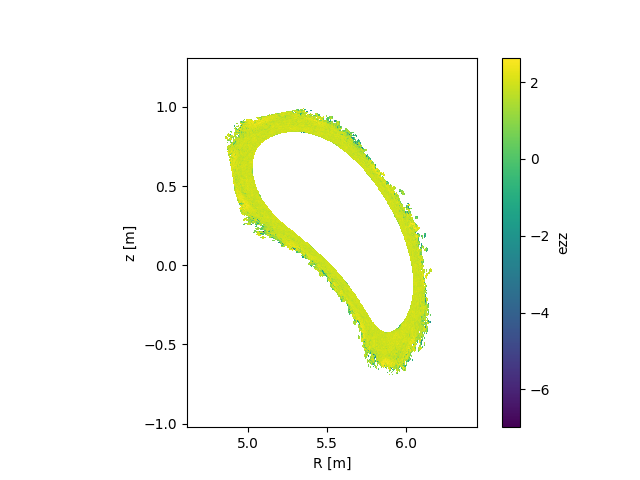

/u/phg/.local/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [64]:
plt.close("all")
fig, ax = plt.subplots()
phi_index = 16
#ds["ezz"] = ds.ne
#ds["ezz"] = ds.nZ1+ds.nZ2+ds.nZ3+ds.nZ4+ds.nZ5+ds.nZ6
ds["ezz"] = np.log(ds.Ez.isel(Ionization=6)+0.1)
ds["ezz"] = np.log(ds["ezz"]+0.1)
ds.emc3.plot_rz("ezz", phi=phi_index*np.pi/180, ax=ax) # , vmax=43, vmin=40)

<IPython.core.display.Javascript object>


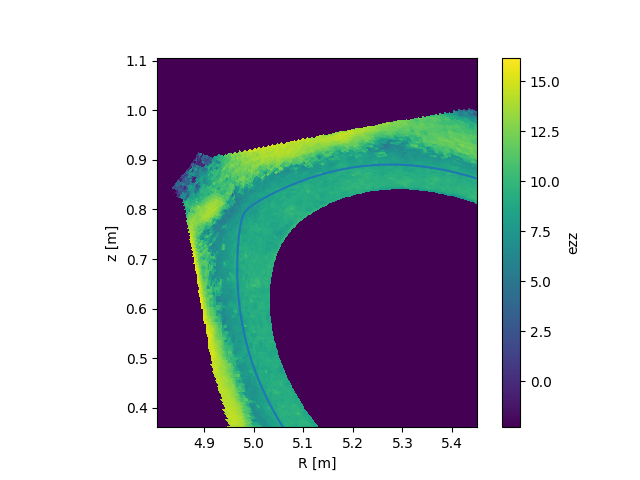

In [34]:
plt.close("all")
fig, ax = plt.subplots()
phi_index = 16
#ds["ezz"] = np.log(ds.Ez[4]+0.1)
ds["ezz"] = np.log(ds.Ez.sum(dim="Ionization")+0.1)
ds.emc3.plot_rz("ezz", phi=phi_index*np.pi/180, ax=ax)

# islands
# from pathlib import Path
# for i,file in enumerate(Path("./../radiation Ez analysis/data/").glob("island*")):
#     x, y = np.load(file)
#     print(file)
#     ax.plot(x,y, c="lime", lw=1, ls="-.", label="islands", zorder=50000)
    
ax.plot(ds.R_bounds[47,:,phi_index,0,0,0], ds.z_bounds[47,:,phi_index,0,0,0], zorder=1e6)

In [160]:
np.isnan(ds.ne).sum(dim=("theta", "phi"))[69:] # -> 70 

<xarray.DataArray 'ne' (r: 70)>
array([    0,     6,    31,   142,   256,   366,   524,   678,   822,
         937,  1055,  1161,  1277,  1385,  1483,  1588,  1700,  1813,
        1890,  1931,  1980,  2035,  2078,  2129,  2175,  2218,  2272,
        2321,  2371,  2429,  2492,  2567,  2643,  2743,  2839,  2920,
        2992,  3057,  3130,  3195,  3256,  3314,  3374,  3434,  3489,
        3541,  3592,  3661,  3722,  3776,  3842,  3897,  3968,  4022,
        4097,  4157,  4220,  4348,  4569,  4737,  4936,  5132,  5357,
        5584,  5738,  5883,  6018,  6219,  6386, 18432])
Dimensions without coordinates: r

In [161]:
ds.R_bounds[:, 512//2, 0, 0, 0, 0][70]  # target shadow starts at 6.239962
ds.R_bounds[:, 512//2, 0, 0, 0, 0][69:]  # target shadow starts at 6.239962

<xarray.DataArray 'R_bounds' (r: 70)>
array([6.238596, 6.239962, 6.241301, 6.242641, 6.243997, 6.245394, 6.246803,
       6.248227, 6.249666, 6.251124, 6.252602, 6.254102, 6.255627, 6.257178,
       6.258759, 6.260372, 6.262011, 6.263649, 6.265758, 6.265913, 6.266462,
       6.266985, 6.267488, 6.267976, 6.268452, 6.268922, 6.269391, 6.269861,
       6.270338, 6.270825, 6.271328, 6.271851, 6.2724  , 6.273082, 6.273707,
       6.274405, 6.275079, 6.275733, 6.276368, 6.276988, 6.277596, 6.278193,
       6.278781, 6.279364, 6.279943, 6.280519, 6.281096, 6.281674, 6.282257,
       6.282846, 6.283442, 6.28405 , 6.28467 , 6.285306, 6.285959, 6.286633,
       6.287316, 6.288021, 6.289876, 6.291572, 6.293187, 6.294802, 6.29651 ,
       6.298826, 6.300401, 6.302176, 6.303855, 6.305534, 6.307308, 6.309766])
Coordinates:
    R_bounds    (r) float64 ...
    z_bounds    (r) float64 ...
    phi_bounds  float64 0.0
Dimensions without coordinates: r
Attributes:
    xemc3_type:  geom
    units:       m

In [163]:
ds.R_bounds[:, 512//2, 0, 1, 0, 0][69:] 

<xarray.DataArray 'R_bounds' (r: 70)>
array([6.239962, 6.241301, 6.242641, 6.243997, 6.245394, 6.246803, 6.248227,
       6.249666, 6.251124, 6.252602, 6.254102, 6.255627, 6.257178, 6.258759,
       6.260372, 6.262011, 6.263649, 6.265758, 6.265913, 6.266462, 6.266985,
       6.267488, 6.267976, 6.268452, 6.268922, 6.269391, 6.269861, 6.270338,
       6.270825, 6.271328, 6.271851, 6.2724  , 6.273082, 6.273707, 6.274405,
       6.275079, 6.275733, 6.276368, 6.276988, 6.277596, 6.278193, 6.278781,
       6.279364, 6.279943, 6.280519, 6.281096, 6.281674, 6.282257, 6.282846,
       6.283442, 6.28405 , 6.28467 , 6.285306, 6.285959, 6.286633, 6.287316,
       6.288021, 6.289876, 6.291572, 6.293187, 6.294802, 6.29651 , 6.298826,
       6.300401, 6.302176, 6.303855, 6.305534, 6.307308, 6.309766, 6.51065 ])
Coordinates:
    R_bounds    (r) float64 ...
    z_bounds    (r) float64 ...
    phi_bounds  float64 0.0
Dimensions without coordinates: r
Attributes:
    xemc3_type:  geom
    units:       m